# 1. Introduction and Problem Statement

#### In the competitive banking industry, retaining existing customers is just as important—if not more—than acquiring new ones. Customer churn, or the rate at which customers stop doing business with a company, is a major concern for banks, as it directly impacts revenue, reputation, and operational efficiency.

#### This project focuses on building a machine learning model that can predict whether a customer is likely to leave the bank based on their demographic and transactional data. Early identification of potential churners can help the bank take proactive steps such as targeted offers, improved customer service, or financial incentives to retain valuable customers.

### Objective:

- #### Develop a predictive model to identify customers at risk of churn 

- #### Understand key features influencing customer churn using feature importance analysis

- #### Create a business-ready pipeline for churn prediction that supports future deployment or monitoring

# 2. Dataset understanding and description
## Dataset: ChurnModeling
### Dataset Overview:
#### Features:
- RowNumber
- CustomerId
- Surname
- CreditScore
- Geography
- Gender
- Age
- Tenure
- Balance
- NumOfProducts
- HasCrCard
- IsActiveMember
- EstimatedSalary
- Exited	

# 3. Data Loading, Inspection & Exploration

### Importing Initial Libraries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [141]:
## Loading data
df = pd.read_csv("Churn_Modelling.csv")

### Lets inspect basic structure

In [144]:
print("Shape: ",df.shape)

Shape:  (10000, 14)


In [145]:
print("Columns in Data: ",df.columns.tolist())

Columns in Data:  ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [146]:
print("Data Preview: ",df.head())

Data Preview:     RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0 

### missing values

In [150]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [152]:
df.duplicated().sum()

0

In [153]:
### Data types + non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


###  basic stats

In [155]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Inspection Summary
#### Upon loading and inspecting the dataset, I confirmed that the data is fully clean, with no missing values or incorrect data types and no duplicate exists. All 10,000 customer records are complete and ready for analysis.

### Key observations:

- The dataset consists of 14 columns, including both numerical and categorical features.

- No null or NaN values were found across any column.

- Data types are appropriate for each field (e.g., Balance as float, Age as int, Geography and Gender as object).

## Dropping Irrelevant Columns

##### Columns like RowNumber, CustomerId, and Surname serve no predictive purpose in churn modeling. These are identifiers or personal labels that do not contribute to the machine learning process and may introduce noise or overfitting if retained.

In [161]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# 4. Exploratory Data Analysis (EDA)

### Goal:
#### Understand the distribution of key features and their relationship with the target variable Exited to guide feature engineering and modeling.

### Class Distribution 

In [167]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

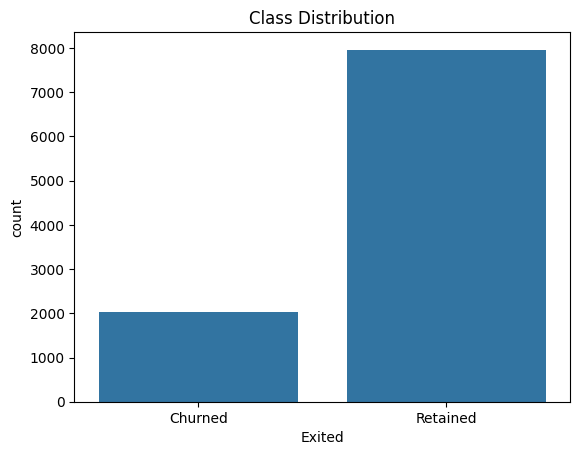

In [168]:
sns.countplot(x=df['Exited'].map({1:'Churned',0:'Retained'}))
plt.title("Class Distribution")
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_4148\1397667094.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Exited'].map({1:'Churned', 0:'Retained'}), palette='Set2')


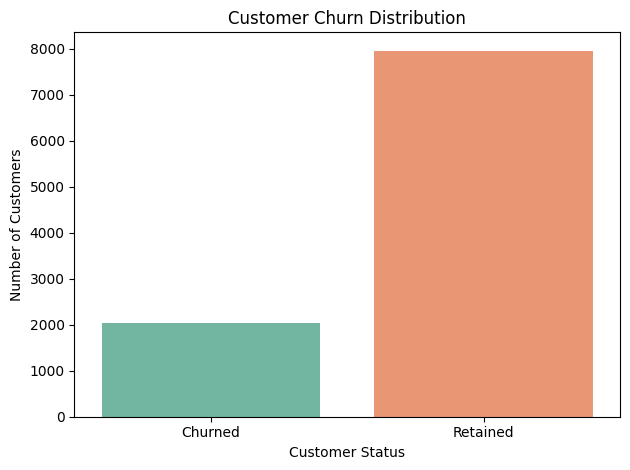

In [171]:
sns.countplot(x=df['Exited'].map({1:'Churned', 0:'Retained'}), palette='Set2')
plt.title("Customer Churn Distribution")
plt.xlabel("Customer Status")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

### Churn Distribution Overview
#### The target variable Exited shows that out of 10,000 bank customers:

- **7963 (≈80%) have been retained**

- **2037 (≈20%) have churned**

#### This confirms a moderate class imbalance, which is common in churn datasets. It suggests that while most customers remain loyal, a significant minority (1 in 5) leave the bank.

### Churn by Geography

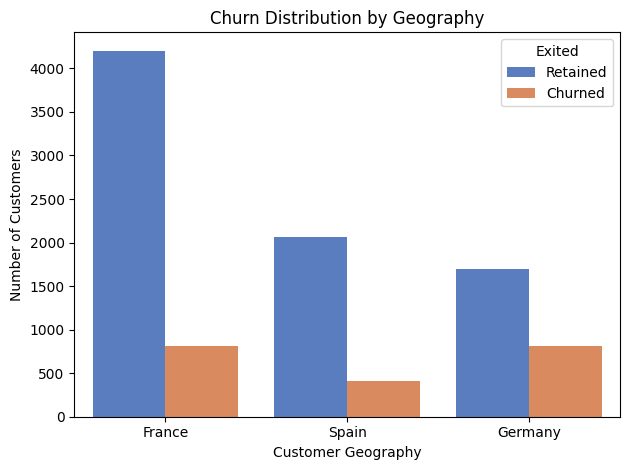

In [175]:
sns.countplot(data=df, x='Geography', hue='Exited', palette='muted')
plt.title("Churn Distribution by Geography")
plt.xlabel("Customer Geography")
plt.ylabel("Number of Customers")
plt.legend(title='Exited', labels=['Retained', 'Churned'])
plt.tight_layout()
plt.show()

### Churn by Geography
The distribution of churn across countries reveals key regional patterns:

- #### Germany has a disproportionately high churn rate: nearly 1 in 2 customers left.

- #### France, despite having the largest customer base, shows a lower churn ratio relative to its size.

- #### Spain has moderate churn, but far lower than Germany.

##### These insights suggest that customer experience or product-market fit may differ by country, especially in Germany. This may warrant region-specific retention strategies or deeper investigation into localized services.

### Churn by Gender

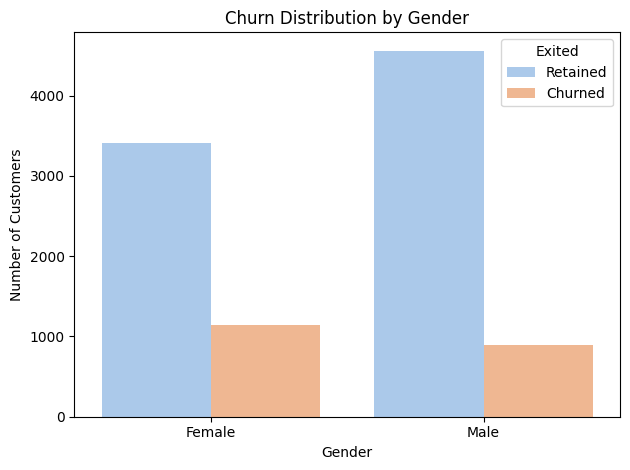

In [178]:
sns.countplot(data=df, x='Gender', hue='Exited', palette='pastel')
plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.legend(title='Exited', labels=['Retained', 'Churned'])
plt.tight_layout()
plt.show()

### Churn by Gender
#### The gender-based churn distribution shows that:

- #### Female customers have a higher churn rate relative to their base — approximately 1 in 4 female customers churned.

- #### Male customers, though more numerous, show a lower churn proportion — around 1 in 6.

#### These insights suggest that female customer segments may require more targeted retention efforts. This could involve deeper analysis into service preferences or pain points experienced by female customers.

### Age vs Churn

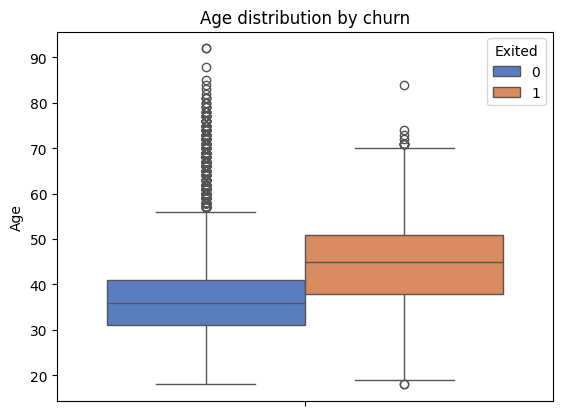

In [181]:
sns.boxplot(hue=df['Exited'], y =df['Age'], palette='muted')
plt.title("Age distribution by churn")
plt.show()

### Age Influence on Churn
#### The boxplot clearly shows that churned customers tend to be older than retained customers:

- #### The median age of churned customers is ~45, compared to ~35 for those retained.

- #### The overall age range of churned customers is wider, suggesting that older customers are more likely to exit the bank.

#### This insight indicates that age-targeted retention strategies may be valuable — particularly for middle-aged and older customer segments. Banks could explore tailored products, loyalty programs, or personalized services for these groups to reduce churn risk.



### Balance vs Churn

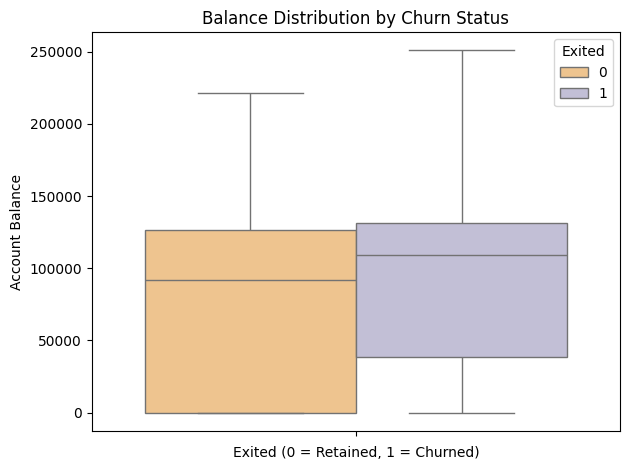

In [187]:
sns.boxplot(data=df, hue='Exited', y='Balance', palette='PuOr')
plt.title("Balance Distribution by Churn Status")
plt.xlabel("Exited (0 = Retained, 1 = Churned)")
plt.ylabel("Account Balance")
plt.tight_layout()
plt.show()

### Balance Influence on Churn
#### The distribution of balances across churned and retained customers shows that:

- #### Both groups have similar median balances (~100k).

- #### Churned customers display a wider balance spread, with more customers in the 50k–140k range.

- #### Both groups include customers with zero balance — but having a higher balance does not guarantee retention.

##### This suggests that balance alone is not a strong predictor of churn — customers leave the bank even with substantial balances.
##### It highlights that other factors (e.g., customer experience, engagement, product fit) may play a larger role in driving churn.

### NumOfProducts vs Churn

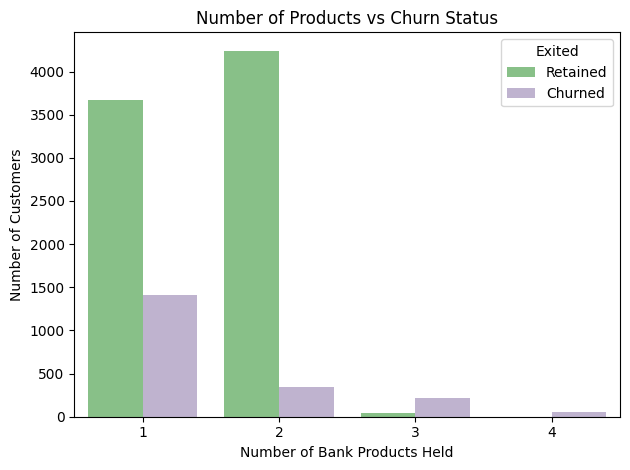

In [195]:
sns.countplot(data=df, x='NumOfProducts', hue='Exited', palette='Accent')
plt.title("Number of Products vs Churn Status")
plt.xlabel("Number of Bank Products Held")
plt.ylabel("Number of Customers")
plt.legend(title='Exited', labels=['Retained', 'Churned'])
plt.tight_layout()
plt.show()

### Number of Products vs Churn (Corrected Insight)
#### The distribution of churn by number of products reveals these patterns:

- #### 1 product customers exhibit the highest absolute churn count — indicating that customers with minimal product engagement are more likely to leave the bank.

- #### 2 product customers show the lowest churn count, suggesting this segment is relatively stable and engaged.

- #### For 3 and 4 product customers:

    - #### These groups are very small overall, with low total counts.

    - #### The number of churned customers is modest (~200 for 3 products and <100 for 4 products).

    - #### The churn proportion within these small groups may appear higher, but given their small size, it is not the main driver of overall churn.

### Business takeaway:

- #### The bank should focus on upselling single-product customers to at least 2 products to improve retention.

- #### The 3–4 product segments are niche — while they deserve attention, they do not drive the bulk of churn volume.

### IsActiveMember vs Churn

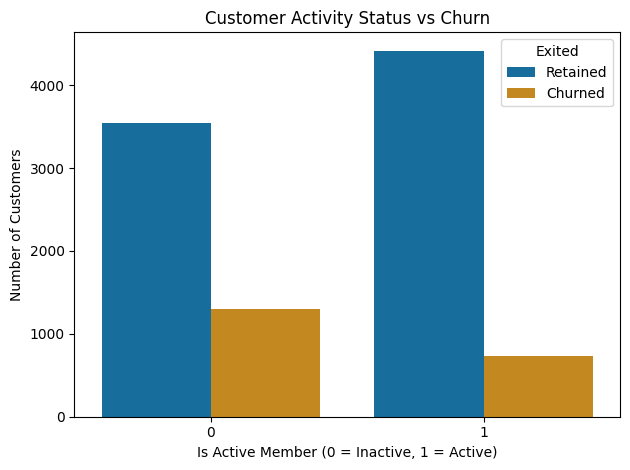

In [201]:
sns.countplot(data=df, x='IsActiveMember', hue='Exited', palette='colorblind')
plt.title("Customer Activity Status vs Churn")
plt.xlabel("Is Active Member (0 = Inactive, 1 = Active)")
plt.ylabel("Number of Customers")
plt.legend(title='Exited', labels=['Retained', 'Churned'])
plt.tight_layout()
plt.show()

### Account Activity vs Churn
#### The relationship between customer activity level and churn shows that:

- #### Inactive members (IsActiveMember = 0) exhibit a much higher churn count relative to their group size (~1200 churned vs ~3500 retained).

- #### Active members (IsActiveMember = 1) are more likely to be retained (~4000+ retained vs less then ~1000 churned).

#### This insight strongly supports the business intuition that account activity is a key driver of retention.

- #### Inactive customers are at significantly higher risk of leaving.

- #### The bank should invest in engagement strategies to encourage activity (e.g., usage nudges, loyalty rewards, proactive outreach).

## Feature distributions

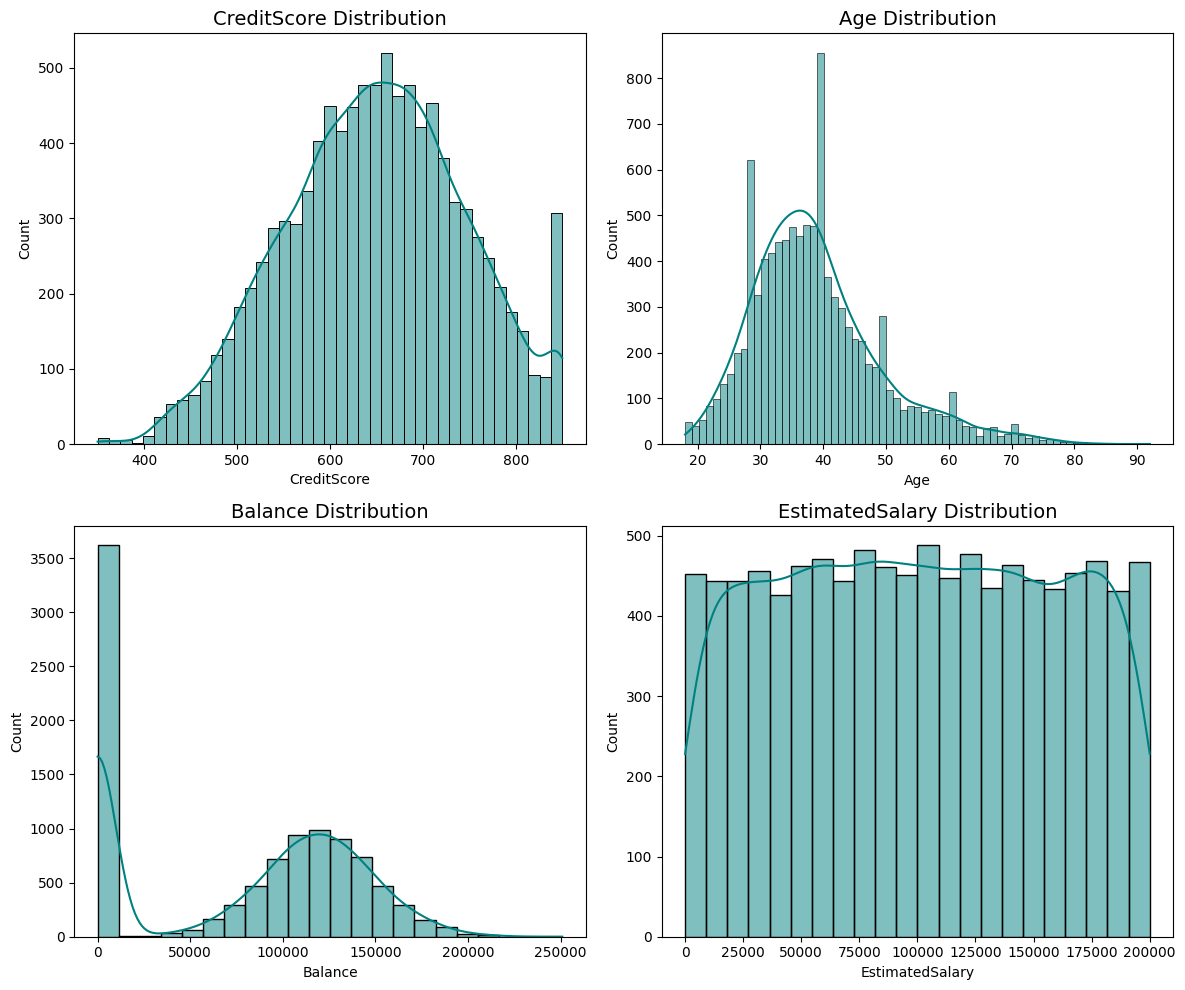

In [205]:
# List of numeric features to plot
features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'{feature} Distribution', fontsize=14)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Numeric Feature Distributions
#### We analyzed the distributions of four key numeric features to better understand customer demographics and financial behavior:

- #### CreditScore: Follows a near-normal distribution, centered around 650-700. Most customers have mid-range credit scores, with very few having extremely low or high scores.

- #### Age: Displays a right-skewed distribution, with a large concentration of customers in their 30s and 40s. Older customers are less represented, though the bank serves a broad age range.

- #### Balance: Shows a bimodal distribution — a significant portion of customers maintain a zero balance, while another cluster holds balances around $100k–$150k. This suggests the existence of both inactive and high-engagement customer segments.

- #### EstimatedSalary: Appears uniformly distributed across the available range, indicating a diverse income profile among customers — useful for building generalized churn models.

#### These insights confirm that the dataset is rich and varied, with meaningful differences in customer profiles that can influence churn.

## Correlation heatmap

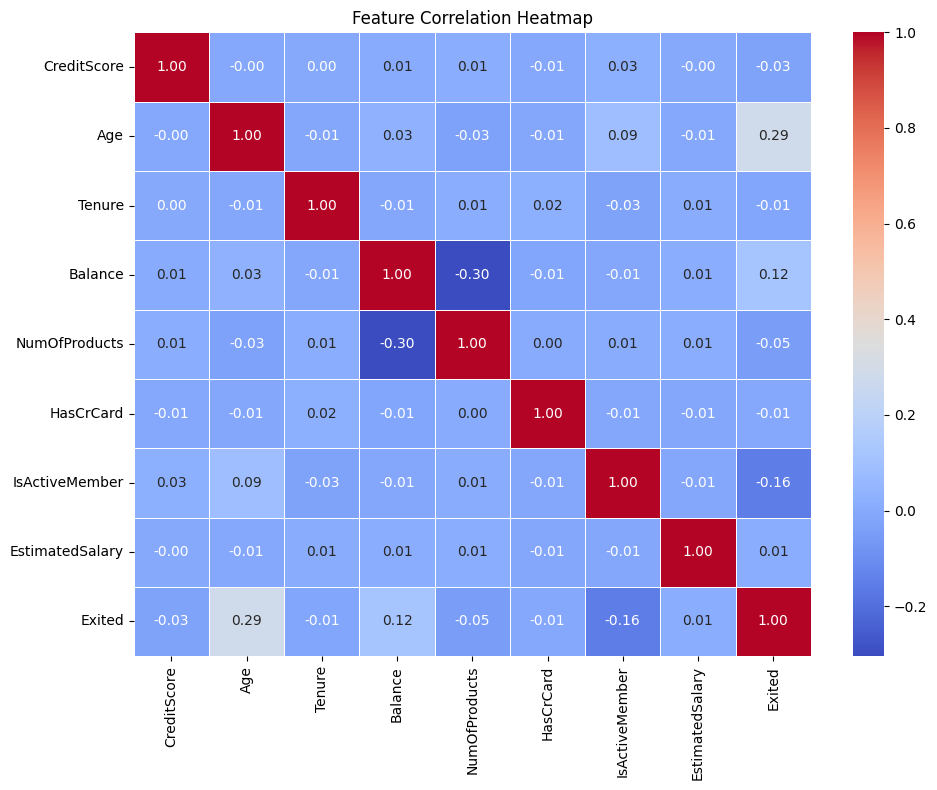

In [211]:
# correlation matrix
corr = df.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

### Correlation Heatmap Insights
#### The feature correlation analysis highlights a few key relationships influencing customer churn:

- #### Age exhibits the strongest positive correlation (0.29) with Exited, confirming earlier EDA insights that older customers are more likely to leave the bank.

- #### IsActiveMember shows a weak negative correlation (-0.16) with churn, reinforcing that active customers are less prone to churn — a valuable behavioral driver for retention strategies.

- #### Balance displays a slight positive correlation (0.12) with churn, indicating that customers with higher balances are slightly more likely to churn, though this effect is weak.

- #### Among independent features, Balance and NumOfProducts have a moderate negative correlation (-0.30), suggesting that customers with higher balances often hold fewer products, which could reflect different customer segments (e.g., wealthy, low-engagement vs. high-engagement users).

- #### Other features (CreditScore, Tenure, EstimatedSalary) exhibit very weak correlations with churn, indicating that these variables may contribute non-linearly or interact with other factors in more complex ways — which will be captured better by advanced models.

##### Overall, the heatmap suggests that Age, IsActiveMember, and Balance should be treated as important features, with special attention given to behavioral engagement (IsActiveMember) and older customer segments during both modeling and business strategy development.

In [214]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Final Feature Summary

### After exploratory data analysis and removal of irrelevant columns, the following 11 features remain for modeling:

- #### CreditScore (numeric) — Customer’s credit score

- #### Geography (categorical) — Customer’s country of residence

- #### Gender (categorical) — Customer’s gender

- #### Age (numeric) — Customer’s age

- #### Tenure (numeric) — Number of years as a customer

- #### Balance (numeric) — Account balance

- #### NumOfProducts (numeric/categorical) — Number of bank products held

- #### HasCrCard (binary) — Whether the customer has a credit card (0/1)

- #### IsActiveMember (binary) — Whether the customer is an active member (0/1)

- #### EstimatedSalary (numeric) — Estimated annual salary

- #### Exited (binary — target) — Whether the customer left the bank (1) or stayed (0)
### These features will now undergo appropriate preprocessing to prepare for modeling:

- #### Categorical encoding for Geography and Gender

- #### Scaling for numeric features where needed

- #### Passthrough for clean binary features (HasCrCard, IsActiveMember)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Data Preprocessing and Modeling

## Separate Features

In [244]:
# Target
target = 'Exited'

# Categorical features
categorical_features = ['Geography', 'Gender']

# Numeric features to scale
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Passthrough features
passthrough_features = ['NumOfProducts', 'HasCrCard', 'IsActiveMember']

## Build ColumnTransformer

In [254]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [249]:
## Defining Transformers 
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = RobustScaler()
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features),
    ('pass', 'passthrough', passthrough_features)
])

## Full Pipeline with RandomForest

In [257]:
rfc_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

## Splitting Data and Training

In [262]:
from sklearn.model_selection import train_test_split

## Split data
X = df.drop(columns=target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
## Fit pipeline
rfc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'EstimatedSalary']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('pass', 'passthrough',
                                                  ['NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [264]:
y_pred = rfc_pipeline.predict(X_test)

# Evaluation

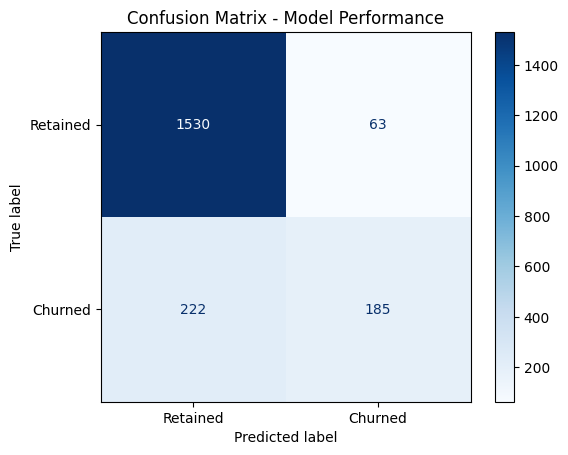

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.45      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



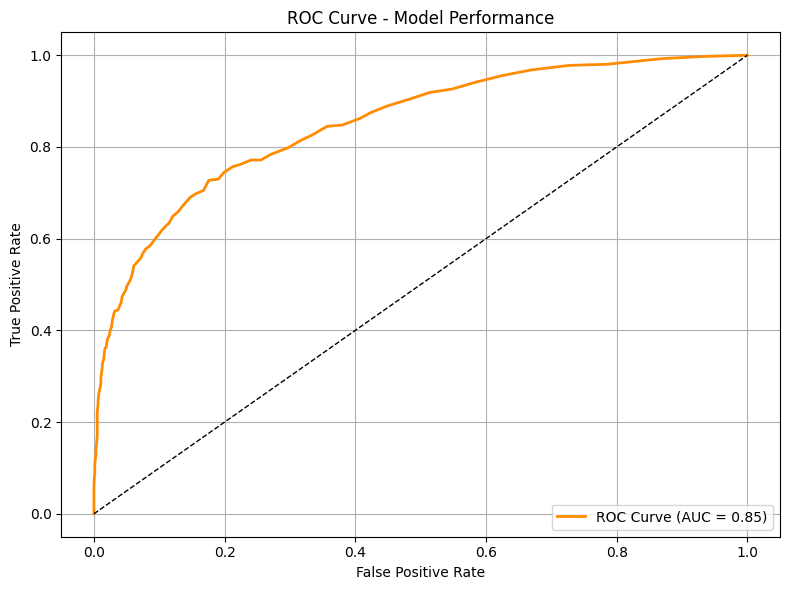

In [267]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rfc_pipeline, X_test, y_test, display_labels=['Retained', 'Churned'], cmap='Blues')
plt.title("Confusion Matrix - Model Performance")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# ROC Curve
y_prob = rfc_pipeline.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', linewidth=2)
plt.plot([0,1], [0,1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Model Performance")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Metrics Bar Chart

C:\Users\HOME\AppData\Local\Temp\ipykernel_4148\1740885249.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_names, y=metrics, palette='pastel')


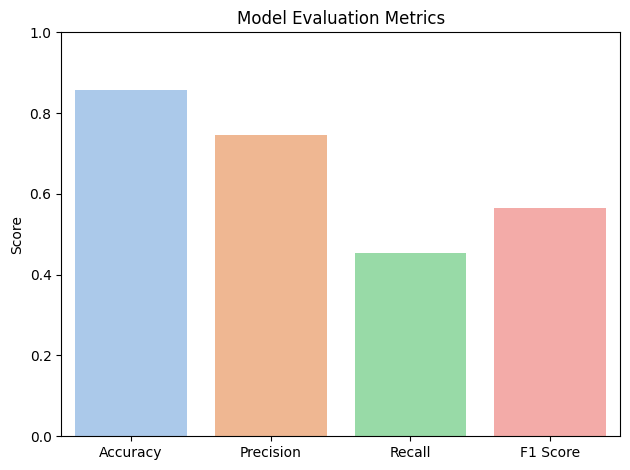

In [275]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# Plot bar chart
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

sns.barplot(x=metric_names, y=metrics, palette='pastel')
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.tight_layout()
plt.show()

## Model Evaluation — Random Forest Classifier
#### I evaluated a Random Forest Classifier to predict customer churn based on behavioral and demographic data. The model demonstrated strong overall performance, balancing high accuracy with useful business insights.
### Performance Metrics:
- **Metric	              Value**
- **Accuracy**	          86%
- **Precision (Churn)**	  75%
- **Recall (Churn)**	      45%
- **F1 Score (Churn)**	  56%
- **ROC AUC**	              0.85
### Confusion Matrix Overview:
- **Actual \ Predicted**	               **Retained**	                 **Churned**
- **Retained (0)**	                           1530	                          63
- **Churned (1)**	                           222	                          185
### Business Insights:
- #### The model achieved a high accuracy of 86%, correctly classifying the majority of customers.

- #### The ROC AUC score of 0.85 indicates strong overall discrimination ability between churners and non-churners.

- #### Recall for churned customers (45%) suggests that nearly half of potential churners are being successfully identified — a valuable outcome for proactive retention campaigns.

- #### Precision for churned customers (75%) ensures that when the model predicts churn, it is usually correct — helping optimize resource allocation for targeted retention.

- #### Most misclassifications occur when predicting churners (false negatives) — consistent with common challenges in imbalanced churn datasets.

## Training Multiple Models

In [288]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}
results = []

# Iterate through models
for name, clf in models.items():
    # pipeline
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', clf)
    ])
    
    # Fit
    pipeline.fit(X_train, y_train)
    
    # Predict
    y_pred = pipeline.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # Appending results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Displaying with coloring for better readability
results_df.style.background_gradient(cmap='Blues', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

,Model,Accuracy,Precision,Recall,F1 Score
0,Gradient Boosting,0.869000,0.782101,0.493857,0.605422
1,AdaBoost,0.860000,0.763485,0.452088,0.567901
2,Random Forest,0.857500,0.745968,0.454545,0.564885
3,XGBoost,0.845000,0.666667,0.476658,0.555874
4,Decision Tree,0.783500,0.470721,0.513514,0.491187
5,K-Nearest Neighbors,0.837500,0.688073,0.368550,0.480000
6,Logistic Regression,0.808000,0.589147,0.186732,0.283582


### Barplot for Top Models 

C:\Users\HOME\AppData\Local\Temp\ipykernel_4148\37942995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F1 Score', y='Model', data=results_df, palette='pastel')


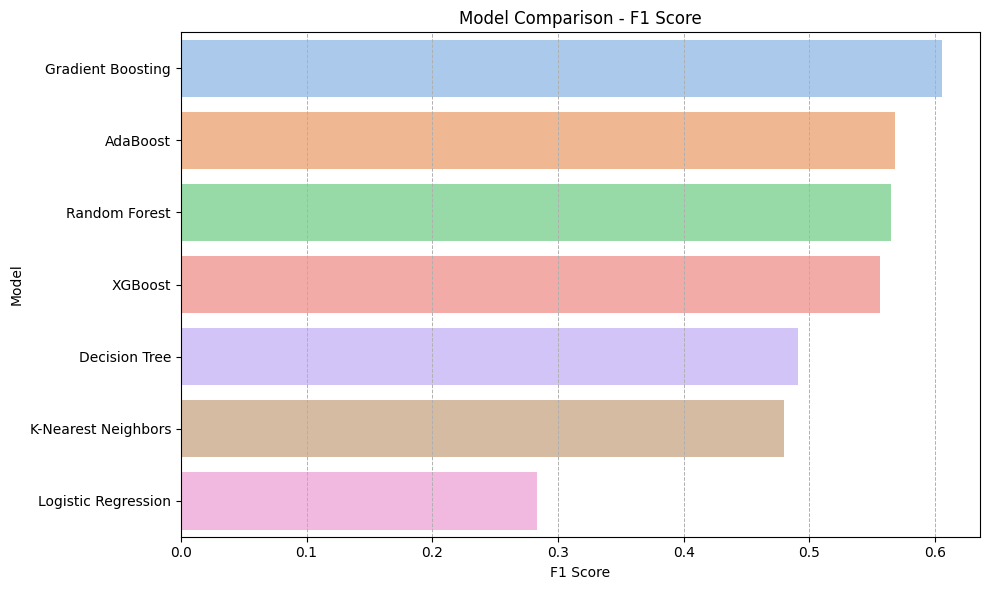

In [297]:
plt.figure(figsize=(10,6))
sns.barplot(x='F1 Score', y='Model', data=results_df, palette='pastel')

# Titles and labels
plt.title('Model Comparison - F1 Score')
plt.xlabel('F1 Score')
plt.ylabel('Model')

# Grid for better readability
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

### Model Benchmarking Summary:
#### Multiple classification models were benchmarked to identify customers at risk of churn. All models were trained using the same preprocessing pipeline to ensure a fair comparison.
#### The models were evaluated on accuracy, precision, recall, and F1 score — with particular emphasis on F1 score, as it balances precision and recall in the face of class imbalance.
### Top Performing Models (by F1 Score):
**Model**	           **F1 Score**
**Gradient Boosting**	   0.61
**AdaBoost**	           0.57
**Random Forest**	       0.56
**XGBoost**	               0.56
### Business Insights:
- #### Gradient Boosting achieved the best overall F1 Score (0.61) and strong precision (~0.78), making it a good choice for identifying high-risk customers while controlling false positives.

- #### AdaBoost and Random Forest also performed well, offering strong alternatives with good balance between precision and recall.

- #### XGBoost, though slightly behind on F1, demonstrated robust recall (~47%) and may be suitable for business cases where maximizing churn capture is prioritized.

- #### Simpler models such as Logistic Regression and KNN underperformed on F1 score — indicating that more complex models are better suited to capturing the nonlinear patterns in this dataset.

### Business Takeaway:
- #### Based on this analysis, Gradient Boosting or Random Forest are strong candidates for deployment or further tuning.

### Multi-Metric Barplot Grid

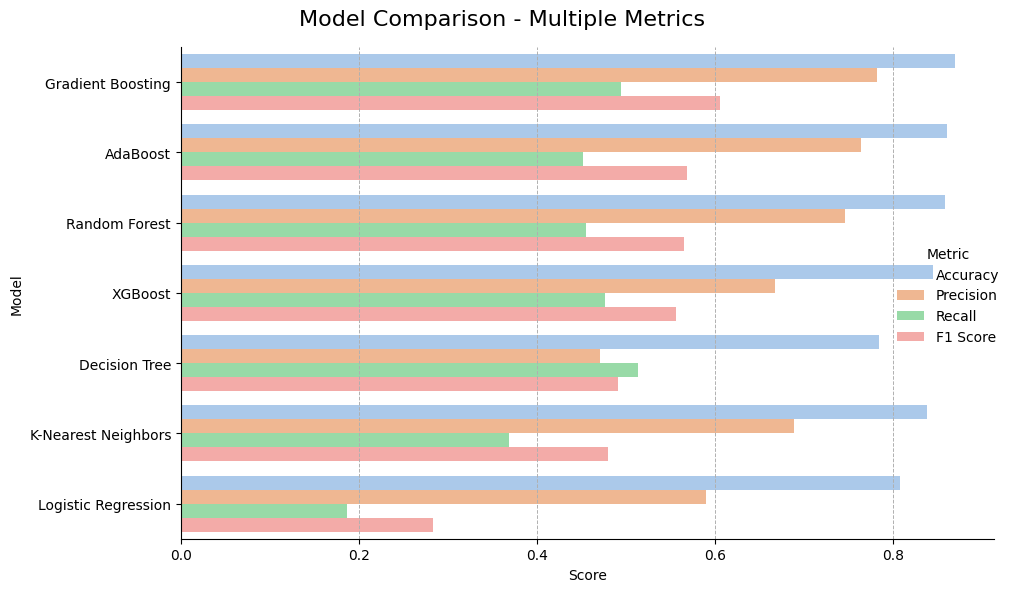

In [303]:
# Melt the DataFrame for seaborn FacetGrid
metrics_melted = results_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                                 var_name='Metric', value_name='Score')

# Plot
g = sns.catplot(data=metrics_melted, kind='bar',
                x='Score', y='Model', hue='Metric',
                palette='pastel', height=6, aspect=1.5)

# Titles and labels
g.fig.suptitle('Model Comparison - Multiple Metrics', fontsize=16)
g.set_axis_labels("Score", "Model")
g._legend.set_title("Metric")

# Adding gridlines
for ax in g.axes.flat:
    ax.grid(axis='x', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

In [305]:
## Lets tune it 

## Tuning through Optuna

In [312]:
import optuna
from sklearn.model_selection import cross_val_score

In [314]:
# objective function for Optuna
def objective(trial):
    # Hyperparams
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    gbc = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Pipeline
    pipeline = Pipeline(steps=[
        ('preprocessing', preprocessor),
        ('classifier', gbc)
    ])
    
    # Cross-validation score (optimized for F1)
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1', n_jobs=-1).mean()
    
    return score

# Create study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)  

# Print best parameters
print("Best Hyperparameters:\n", study.best_params)
print("Best F1 Score:", study.best_value)

[I 2025-06-06 13:27:00,632] A new study created in memory with name: no-name-13e32e76-28a8-449c-b424-24d23945d8ac
Best trial: 0. Best value: 0.549499:   1%|▍                                            | 1/100 [00:10<17:26, 10.57s/it]

[I 2025-06-06 13:27:11,230] Trial 0 finished with value: 0.5494992054717175 and parameters: {'n_estimators': 483, 'learning_rate': 0.223389097925429, 'max_depth': 6, 'subsample': 0.7400195357862054, 'min_samples_split': 16, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.5494992054717175.


Best trial: 1. Best value: 0.582861:   2%|▉                                            | 2/100 [00:14<10:43,  6.57s/it]

[I 2025-06-06 13:27:14,996] Trial 1 finished with value: 0.5828607884855934 and parameters: {'n_estimators': 165, 'learning_rate': 0.2009117500737409, 'max_depth': 4, 'subsample': 0.7939397797910002, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.5828607884855934.


Best trial: 1. Best value: 0.582861:   3%|█▎                                           | 3/100 [00:25<13:59,  8.66s/it]

[I 2025-06-06 13:27:26,143] Trial 2 finished with value: 0.5620210470089589 and parameters: {'n_estimators': 458, 'learning_rate': 0.1300172121849386, 'max_depth': 7, 'subsample': 0.8554316327267557, 'min_samples_split': 17, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.5828607884855934.


Best trial: 1. Best value: 0.582861:   4%|█▊                                           | 4/100 [00:28<10:08,  6.34s/it]

[I 2025-06-06 13:27:28,923] Trial 3 finished with value: 0.5708803143488547 and parameters: {'n_estimators': 376, 'learning_rate': 0.29446789880034396, 'max_depth': 3, 'subsample': 0.5315813035615968, 'min_samples_split': 6, 'min_samples_leaf': 14}. Best is trial 1 with value: 0.5828607884855934.


Best trial: 1. Best value: 0.582861:   5%|██▎                                          | 5/100 [00:44<15:24,  9.73s/it]

[I 2025-06-06 13:27:44,676] Trial 4 finished with value: 0.5656301237974557 and parameters: {'n_estimators': 419, 'learning_rate': 0.2612470002481909, 'max_depth': 9, 'subsample': 0.9985085870190644, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.5828607884855934.


Best trial: 1. Best value: 0.582861:   6%|██▋                                          | 6/100 [00:55<16:11, 10.34s/it]

[I 2025-06-06 13:27:56,191] Trial 5 finished with value: 0.5718753305834059 and parameters: {'n_estimators': 446, 'learning_rate': 0.0739022360621688, 'max_depth': 9, 'subsample': 0.5784088610238043, 'min_samples_split': 19, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.5828607884855934.


Best trial: 1. Best value: 0.582861:   7%|███▏                                         | 7/100 [01:04<15:06,  9.74s/it]

[I 2025-06-06 13:28:04,710] Trial 6 finished with value: 0.578190878865833 and parameters: {'n_estimators': 361, 'learning_rate': 0.1242748535022338, 'max_depth': 6, 'subsample': 0.8460180243160683, 'min_samples_split': 13, 'min_samples_leaf': 18}. Best is trial 1 with value: 0.5828607884855934.


Best trial: 7. Best value: 0.583294:   8%|███▌                                         | 8/100 [01:19<17:57, 11.72s/it]

[I 2025-06-06 13:28:20,644] Trial 7 finished with value: 0.5832935317409631 and parameters: {'n_estimators': 430, 'learning_rate': 0.039790654989377824, 'max_depth': 8, 'subsample': 0.7838005947361111, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 7 with value: 0.5832935317409631.


Best trial: 7. Best value: 0.583294:   9%|████                                         | 9/100 [01:23<13:54,  9.17s/it]

[I 2025-06-06 13:28:24,209] Trial 8 finished with value: 0.5777630046775706 and parameters: {'n_estimators': 171, 'learning_rate': 0.2775676784946666, 'max_depth': 5, 'subsample': 0.7295291120832046, 'min_samples_split': 7, 'min_samples_leaf': 7}. Best is trial 7 with value: 0.5832935317409631.


Best trial: 7. Best value: 0.583294:  10%|████▍                                       | 10/100 [01:44<19:13, 12.82s/it]

[I 2025-06-06 13:28:45,203] Trial 9 finished with value: 0.5664368979943106 and parameters: {'n_estimators': 424, 'learning_rate': 0.18182695980429647, 'max_depth': 10, 'subsample': 0.8689252071140035, 'min_samples_split': 18, 'min_samples_leaf': 10}. Best is trial 7 with value: 0.5832935317409631.


Best trial: 10. Best value: 0.589059:  11%|████▋                                      | 11/100 [01:53<17:21, 11.70s/it]

[I 2025-06-06 13:28:54,378] Trial 10 finished with value: 0.5890589000450388 and parameters: {'n_estimators': 272, 'learning_rate': 0.018077289726096568, 'max_depth': 8, 'subsample': 0.644960578150211, 'min_samples_split': 13, 'min_samples_leaf': 5}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  12%|█████▏                                     | 12/100 [02:02<15:58, 10.89s/it]

[I 2025-06-06 13:29:03,380] Trial 11 finished with value: 0.5888688345539294 and parameters: {'n_estimators': 273, 'learning_rate': 0.016487704960598346, 'max_depth': 8, 'subsample': 0.6229272831958435, 'min_samples_split': 12, 'min_samples_leaf': 5}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  13%|█████▌                                     | 13/100 [02:11<14:48, 10.22s/it]

[I 2025-06-06 13:29:12,076] Trial 12 finished with value: 0.5810132859702387 and parameters: {'n_estimators': 252, 'learning_rate': 0.011352454173574162, 'max_depth': 8, 'subsample': 0.6309157149832247, 'min_samples_split': 11, 'min_samples_leaf': 5}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  14%|██████                                     | 14/100 [02:18<13:29,  9.41s/it]

[I 2025-06-06 13:29:19,614] Trial 13 finished with value: 0.5751675539275874 and parameters: {'n_estimators': 251, 'learning_rate': 0.07333080144711342, 'max_depth': 7, 'subsample': 0.6656555266737615, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  15%|██████▍                                    | 15/100 [02:30<14:07,  9.97s/it]

[I 2025-06-06 13:29:30,881] Trial 14 finished with value: 0.5734029171216892 and parameters: {'n_estimators': 272, 'learning_rate': 0.07363364753502472, 'max_depth': 10, 'subsample': 0.6449332527738671, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  16%|██████▉                                    | 16/100 [02:33<10:56,  7.82s/it]

[I 2025-06-06 13:29:33,692] Trial 15 finished with value: 0.5547541165576717 and parameters: {'n_estimators': 111, 'learning_rate': 0.01772584096282609, 'max_depth': 8, 'subsample': 0.5185527583639931, 'min_samples_split': 9, 'min_samples_leaf': 7}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  17%|███████▎                                   | 17/100 [02:43<12:01,  8.69s/it]

[I 2025-06-06 13:29:44,430] Trial 16 finished with value: 0.5702114691229744 and parameters: {'n_estimators': 314, 'learning_rate': 0.10914001251432841, 'max_depth': 9, 'subsample': 0.6883624121544096, 'min_samples_split': 15, 'min_samples_leaf': 7}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  18%|███████▋                                   | 18/100 [02:48<10:06,  7.40s/it]

[I 2025-06-06 13:29:48,818] Trial 17 finished with value: 0.5814674894847545 and parameters: {'n_estimators': 204, 'learning_rate': 0.043634859908186996, 'max_depth': 7, 'subsample': 0.5788352436262213, 'min_samples_split': 20, 'min_samples_leaf': 15}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  19%|████████▏                                  | 19/100 [02:53<09:09,  6.78s/it]

[I 2025-06-06 13:29:54,157] Trial 18 finished with value: 0.5629756026765385 and parameters: {'n_estimators': 334, 'learning_rate': 0.1570886395501867, 'max_depth': 5, 'subsample': 0.5980296642336101, 'min_samples_split': 12, 'min_samples_leaf': 8}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  20%|████████▌                                  | 20/100 [03:00<08:56,  6.70s/it]

[I 2025-06-06 13:30:00,672] Trial 19 finished with value: 0.571354071467993 and parameters: {'n_estimators': 227, 'learning_rate': 0.09844079172685438, 'max_depth': 8, 'subsample': 0.7111939509980324, 'min_samples_split': 4, 'min_samples_leaf': 12}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  21%|█████████                                  | 21/100 [03:08<09:28,  7.20s/it]

[I 2025-06-06 13:30:09,035] Trial 20 finished with value: 0.5849555604506123 and parameters: {'n_estimators': 291, 'learning_rate': 0.04311977448903501, 'max_depth': 9, 'subsample': 0.5022741955514726, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  22%|█████████▍                                 | 22/100 [03:16<09:43,  7.48s/it]

[I 2025-06-06 13:30:17,153] Trial 21 finished with value: 0.5789311039920526 and parameters: {'n_estimators': 289, 'learning_rate': 0.0423410005190783, 'max_depth': 9, 'subsample': 0.5135026171440134, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  23%|█████████▉                                 | 23/100 [03:27<10:52,  8.47s/it]

[I 2025-06-06 13:30:27,960] Trial 22 finished with value: 0.5798854560440798 and parameters: {'n_estimators': 316, 'learning_rate': 0.03804771732202711, 'max_depth': 10, 'subsample': 0.5579903995932614, 'min_samples_split': 11, 'min_samples_leaf': 2}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  24%|██████████▎                                | 24/100 [03:37<11:30,  9.09s/it]

[I 2025-06-06 13:30:38,476] Trial 23 finished with value: 0.5773817892704296 and parameters: {'n_estimators': 376, 'learning_rate': 0.06139891244814247, 'max_depth': 8, 'subsample': 0.6125043396283286, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  25%|██████████▊                                | 25/100 [03:44<10:36,  8.49s/it]

[I 2025-06-06 13:30:45,560] Trial 24 finished with value: 0.5831063040346824 and parameters: {'n_estimators': 203, 'learning_rate': 0.012991349653205938, 'max_depth': 9, 'subsample': 0.674795034040446, 'min_samples_split': 15, 'min_samples_leaf': 6}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  26%|███████████▏                               | 26/100 [03:51<09:37,  7.80s/it]

[I 2025-06-06 13:30:51,773] Trial 25 finished with value: 0.5731914661453967 and parameters: {'n_estimators': 281, 'learning_rate': 0.08805613112592611, 'max_depth': 7, 'subsample': 0.5635443763103387, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  27%|███████████▌                               | 27/100 [03:59<09:40,  7.95s/it]

[I 2025-06-06 13:31:00,068] Trial 26 finished with value: 0.5774463216800071 and parameters: {'n_estimators': 343, 'learning_rate': 0.05378461839058875, 'max_depth': 8, 'subsample': 0.5050028178283896, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  28%|████████████                               | 28/100 [04:10<10:42,  8.93s/it]

[I 2025-06-06 13:31:11,282] Trial 27 finished with value: 0.5712685288445064 and parameters: {'n_estimators': 248, 'learning_rate': 0.0305086824025322, 'max_depth': 10, 'subsample': 0.6328499751702723, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  29%|████████████▍                              | 29/100 [04:18<10:00,  8.46s/it]

[I 2025-06-06 13:31:18,660] Trial 28 finished with value: 0.5601942513005623 and parameters: {'n_estimators': 304, 'learning_rate': 0.14672605134856095, 'max_depth': 6, 'subsample': 0.7786949795256479, 'min_samples_split': 13, 'min_samples_leaf': 1}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  30%|████████████▉                              | 30/100 [06:24<51:12, 43.89s/it]

[I 2025-06-06 13:33:25,197] Trial 29 finished with value: 0.5549211971019845 and parameters: {'n_estimators': 224, 'learning_rate': 0.24110879425390375, 'max_depth': 9, 'subsample': 0.5516084727123072, 'min_samples_split': 15, 'min_samples_leaf': 13}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  31%|█████████████▎                             | 31/100 [06:28<36:40, 31.89s/it]

[I 2025-06-06 13:33:29,079] Trial 30 finished with value: 0.5849479889663095 and parameters: {'n_estimators': 176, 'learning_rate': 0.021387709381924136, 'max_depth': 7, 'subsample': 0.7038039196955737, 'min_samples_split': 17, 'min_samples_leaf': 11}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 10. Best value: 0.589059:  32%|█████████████▊                             | 32/100 [06:31<26:13, 23.14s/it]

[I 2025-06-06 13:33:31,820] Trial 31 finished with value: 0.5806930834440773 and parameters: {'n_estimators': 134, 'learning_rate': 0.02491870968984009, 'max_depth': 7, 'subsample': 0.7017519433927486, 'min_samples_split': 17, 'min_samples_leaf': 11}. Best is trial 10 with value: 0.5890589000450388.


Best trial: 32. Best value: 0.595202:  33%|██████████████▏                            | 33/100 [06:33<18:51, 16.89s/it]

[I 2025-06-06 13:33:34,119] Trial 32 finished with value: 0.5952020750546734 and parameters: {'n_estimators': 163, 'learning_rate': 0.05771726891223171, 'max_depth': 5, 'subsample': 0.7384102824800715, 'min_samples_split': 10, 'min_samples_leaf': 16}. Best is trial 32 with value: 0.5952020750546734.


Best trial: 32. Best value: 0.595202:  34%|██████████████▌                            | 34/100 [06:40<15:20, 13.95s/it]

[I 2025-06-06 13:33:41,218] Trial 33 finished with value: 0.5927385359193179 and parameters: {'n_estimators': 489, 'learning_rate': 0.05928118955820377, 'max_depth': 5, 'subsample': 0.7468331418268803, 'min_samples_split': 10, 'min_samples_leaf': 18}. Best is trial 32 with value: 0.5952020750546734.


Best trial: 32. Best value: 0.595202:  35%|███████████████                            | 35/100 [06:47<12:51, 11.87s/it]

[I 2025-06-06 13:33:48,233] Trial 34 finished with value: 0.588002728533093 and parameters: {'n_estimators': 492, 'learning_rate': 0.059901947234315675, 'max_depth': 5, 'subsample': 0.7487009102375752, 'min_samples_split': 11, 'min_samples_leaf': 17}. Best is trial 32 with value: 0.5952020750546734.


Best trial: 32. Best value: 0.595202:  36%|███████████████▍                           | 36/100 [06:49<09:29,  8.89s/it]

[I 2025-06-06 13:33:50,179] Trial 35 finished with value: 0.5951268114432452 and parameters: {'n_estimators': 138, 'learning_rate': 0.09557533129617417, 'max_depth': 4, 'subsample': 0.8993805262707157, 'min_samples_split': 10, 'min_samples_leaf': 19}. Best is trial 32 with value: 0.5952020750546734.


Best trial: 32. Best value: 0.595202:  37%|███████████████▉                           | 37/100 [06:51<07:02,  6.70s/it]

[I 2025-06-06 13:33:51,780] Trial 36 finished with value: 0.5914067067340713 and parameters: {'n_estimators': 142, 'learning_rate': 0.11682992510525567, 'max_depth': 3, 'subsample': 0.9537223410994541, 'min_samples_split': 10, 'min_samples_leaf': 19}. Best is trial 32 with value: 0.5952020750546734.


Best trial: 32. Best value: 0.595202:  38%|████████████████▎                          | 38/100 [06:52<05:21,  5.18s/it]

[I 2025-06-06 13:33:53,393] Trial 37 finished with value: 0.5881009232805157 and parameters: {'n_estimators': 140, 'learning_rate': 0.11601118063143726, 'max_depth': 3, 'subsample': 0.9604514609927894, 'min_samples_split': 10, 'min_samples_leaf': 20}. Best is trial 32 with value: 0.5952020750546734.


Best trial: 32. Best value: 0.595202:  39%|████████████████▊                          | 39/100 [06:54<04:08,  4.07s/it]

[I 2025-06-06 13:33:54,872] Trial 38 finished with value: 0.5859221774942737 and parameters: {'n_estimators': 101, 'learning_rate': 0.14008028613610848, 'max_depth': 4, 'subsample': 0.9293187070516198, 'min_samples_split': 7, 'min_samples_leaf': 18}. Best is trial 32 with value: 0.5952020750546734.


Best trial: 32. Best value: 0.595202:  40%|█████████████████▏                         | 40/100 [06:55<03:21,  3.36s/it]

[I 2025-06-06 13:33:56,595] Trial 39 finished with value: 0.592590442081155 and parameters: {'n_estimators': 129, 'learning_rate': 0.0882072805342293, 'max_depth': 4, 'subsample': 0.8245214476973666, 'min_samples_split': 10, 'min_samples_leaf': 17}. Best is trial 32 with value: 0.5952020750546734.


Best trial: 40. Best value: 0.597317:  41%|█████████████████▋                         | 41/100 [06:58<02:57,  3.00s/it]

[I 2025-06-06 13:33:58,740] Trial 40 finished with value: 0.5973165651758339 and parameters: {'n_estimators': 162, 'learning_rate': 0.09096203754071448, 'max_depth': 4, 'subsample': 0.8254568437096395, 'min_samples_split': 8, 'min_samples_leaf': 16}. Best is trial 40 with value: 0.5973165651758339.


Best trial: 41. Best value: 0.600684:  42%|██████████████████                         | 42/100 [07:00<02:38,  2.73s/it]

[I 2025-06-06 13:34:00,841] Trial 41 finished with value: 0.6006840001702318 and parameters: {'n_estimators': 159, 'learning_rate': 0.09412738428178559, 'max_depth': 4, 'subsample': 0.8237528951799573, 'min_samples_split': 8, 'min_samples_leaf': 16}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  43%|██████████████████▍                        | 43/100 [07:02<02:29,  2.63s/it]

[I 2025-06-06 13:34:03,234] Trial 42 finished with value: 0.5933877471966247 and parameters: {'n_estimators': 171, 'learning_rate': 0.09544140099460538, 'max_depth': 4, 'subsample': 0.8914080107248631, 'min_samples_split': 5, 'min_samples_leaf': 15}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  44%|██████████████████▉                        | 44/100 [07:04<02:20,  2.51s/it]

[I 2025-06-06 13:34:05,475] Trial 43 finished with value: 0.5960805067456701 and parameters: {'n_estimators': 161, 'learning_rate': 0.09420948200758206, 'max_depth': 4, 'subsample': 0.8899729182750502, 'min_samples_split': 4, 'min_samples_leaf': 15}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  45%|███████████████████▎                       | 45/100 [07:07<02:18,  2.53s/it]

[I 2025-06-06 13:34:08,038] Trial 44 finished with value: 0.5870345488819788 and parameters: {'n_estimators': 193, 'learning_rate': 0.176372839646235, 'max_depth': 4, 'subsample': 0.8360335139809276, 'min_samples_split': 3, 'min_samples_leaf': 16}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  46%|███████████████████▊                       | 46/100 [07:08<02:01,  2.25s/it]

[I 2025-06-06 13:34:09,626] Trial 45 finished with value: 0.5920651345578534 and parameters: {'n_estimators': 152, 'learning_rate': 0.08081274718069843, 'max_depth': 3, 'subsample': 0.807658060579527, 'min_samples_split': 5, 'min_samples_leaf': 14}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  47%|████████████████████▏                      | 47/100 [07:11<01:56,  2.19s/it]

[I 2025-06-06 13:34:11,691] Trial 46 finished with value: 0.5939030522736533 and parameters: {'n_estimators': 117, 'learning_rate': 0.1319915484569627, 'max_depth': 5, 'subsample': 0.8815051130256064, 'min_samples_split': 8, 'min_samples_leaf': 16}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  48%|████████████████████▋                      | 48/100 [07:13<01:56,  2.23s/it]

[I 2025-06-06 13:34:14,018] Trial 47 finished with value: 0.5941063660805095 and parameters: {'n_estimators': 160, 'learning_rate': 0.11142209145061518, 'max_depth': 4, 'subsample': 0.9012044933207944, 'min_samples_split': 6, 'min_samples_leaf': 19}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  49%|█████████████████████                      | 49/100 [07:15<01:50,  2.16s/it]

[I 2025-06-06 13:34:16,005] Trial 48 finished with value: 0.5958660921993784 and parameters: {'n_estimators': 190, 'learning_rate': 0.10584799079724805, 'max_depth': 3, 'subsample': 0.7763979545601354, 'min_samples_split': 8, 'min_samples_leaf': 14}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  50%|█████████████████████▌                     | 50/100 [07:17<01:48,  2.18s/it]

[I 2025-06-06 13:34:18,226] Trial 49 finished with value: 0.5923667828079873 and parameters: {'n_estimators': 183, 'learning_rate': 0.07136215932550392, 'max_depth': 3, 'subsample': 0.7842315897542581, 'min_samples_split': 8, 'min_samples_leaf': 14}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  51%|█████████████████████▉                     | 51/100 [07:20<01:54,  2.33s/it]

[I 2025-06-06 13:34:20,909] Trial 50 finished with value: 0.5947565475619803 and parameters: {'n_estimators': 222, 'learning_rate': 0.1636825688810062, 'max_depth': 3, 'subsample': 0.7640476439674185, 'min_samples_split': 2, 'min_samples_leaf': 13}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  52%|██████████████████████▎                    | 52/100 [07:22<01:55,  2.40s/it]

[I 2025-06-06 13:34:23,481] Trial 51 finished with value: 0.5880422186376384 and parameters: {'n_estimators': 161, 'learning_rate': 0.10198622295218701, 'max_depth': 4, 'subsample': 0.8512393497012026, 'min_samples_split': 7, 'min_samples_leaf': 16}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  53%|██████████████████████▊                    | 53/100 [07:25<02:02,  2.60s/it]

[I 2025-06-06 13:34:26,543] Trial 52 finished with value: 0.5908597819881626 and parameters: {'n_estimators': 189, 'learning_rate': 0.13340348300180743, 'max_depth': 4, 'subsample': 0.9136643948865394, 'min_samples_split': 6, 'min_samples_leaf': 15}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  54%|███████████████████████▏                   | 54/100 [07:28<01:57,  2.55s/it]

[I 2025-06-06 13:34:28,988] Trial 53 finished with value: 0.5892645089381521 and parameters: {'n_estimators': 123, 'learning_rate': 0.1029140973008193, 'max_depth': 5, 'subsample': 0.808870960345926, 'min_samples_split': 8, 'min_samples_leaf': 17}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  55%|███████████████████████▋                   | 55/100 [07:30<01:52,  2.50s/it]

[I 2025-06-06 13:34:31,359] Trial 54 finished with value: 0.5959193250571049 and parameters: {'n_estimators': 152, 'learning_rate': 0.08309541511755675, 'max_depth': 4, 'subsample': 0.8682301178982921, 'min_samples_split': 7, 'min_samples_leaf': 13}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  56%|████████████████████████                   | 56/100 [07:33<01:48,  2.47s/it]

[I 2025-06-06 13:34:33,769] Trial 55 finished with value: 0.5858207560555508 and parameters: {'n_estimators': 154, 'learning_rate': 0.20696862577532488, 'max_depth': 4, 'subsample': 0.8650763195463779, 'min_samples_split': 5, 'min_samples_leaf': 13}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  57%|████████████████████████▌                  | 57/100 [07:37<02:09,  3.02s/it]

[I 2025-06-06 13:34:38,065] Trial 56 finished with value: 0.5853306796854832 and parameters: {'n_estimators': 201, 'learning_rate': 0.08335676538868902, 'max_depth': 6, 'subsample': 0.8112178438164828, 'min_samples_split': 4, 'min_samples_leaf': 15}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  58%|████████████████████████▉                  | 58/100 [07:39<02:00,  2.86s/it]

[I 2025-06-06 13:34:40,568] Trial 57 finished with value: 0.5922118093237497 and parameters: {'n_estimators': 213, 'learning_rate': 0.06948303712476148, 'max_depth': 3, 'subsample': 0.8239070439014733, 'min_samples_split': 7, 'min_samples_leaf': 14}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  59%|█████████████████████████▎                 | 59/100 [07:41<01:44,  2.54s/it]

[I 2025-06-06 13:34:42,364] Trial 58 finished with value: 0.5925617301519728 and parameters: {'n_estimators': 102, 'learning_rate': 0.12214102651564479, 'max_depth': 5, 'subsample': 0.732818164897632, 'min_samples_split': 3, 'min_samples_leaf': 12}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  60%|█████████████████████████▊                 | 60/100 [07:43<01:36,  2.42s/it]

[I 2025-06-06 13:34:44,496] Trial 59 finished with value: 0.5832043688271897 and parameters: {'n_estimators': 169, 'learning_rate': 0.05048563117071682, 'max_depth': 3, 'subsample': 0.8704606283308355, 'min_samples_split': 9, 'min_samples_leaf': 16}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  61%|██████████████████████████▏                | 61/100 [07:48<01:57,  3.02s/it]

[I 2025-06-06 13:34:48,920] Trial 60 finished with value: 0.5894458474890829 and parameters: {'n_estimators': 241, 'learning_rate': 0.08063859451407966, 'max_depth': 5, 'subsample': 0.8425284241891687, 'min_samples_split': 6, 'min_samples_leaf': 13}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  62%|██████████████████████████▋                | 62/100 [07:50<01:44,  2.76s/it]

[I 2025-06-06 13:34:51,074] Trial 61 finished with value: 0.592401759810514 and parameters: {'n_estimators': 149, 'learning_rate': 0.09876693343891849, 'max_depth': 4, 'subsample': 0.7713475346926068, 'min_samples_split': 8, 'min_samples_leaf': 19}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  63%|███████████████████████████                | 63/100 [07:53<01:47,  2.89s/it]

[I 2025-06-06 13:34:54,275] Trial 62 finished with value: 0.592365150171462 and parameters: {'n_estimators': 184, 'learning_rate': 0.08848738835646137, 'max_depth': 4, 'subsample': 0.9202188442507288, 'min_samples_split': 9, 'min_samples_leaf': 17}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  64%|███████████████████████████▌               | 64/100 [07:55<01:33,  2.60s/it]

[I 2025-06-06 13:34:56,193] Trial 63 finished with value: 0.588090557353758 and parameters: {'n_estimators': 128, 'learning_rate': 0.07113987292858459, 'max_depth': 4, 'subsample': 0.7925405875437995, 'min_samples_split': 12, 'min_samples_leaf': 15}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  65%|███████████████████████████▉               | 65/100 [07:57<01:22,  2.37s/it]

[I 2025-06-06 13:34:58,014] Trial 64 finished with value: 0.5863674257971909 and parameters: {'n_estimators': 148, 'learning_rate': 0.0649407830512736, 'max_depth': 3, 'subsample': 0.8579792560262959, 'min_samples_split': 11, 'min_samples_leaf': 20}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  66%|████████████████████████████▍              | 66/100 [08:00<01:30,  2.67s/it]

[I 2025-06-06 13:35:01,411] Trial 65 finished with value: 0.5923070664254654 and parameters: {'n_estimators': 168, 'learning_rate': 0.1057913247388639, 'max_depth': 5, 'subsample': 0.8845575386363197, 'min_samples_split': 10, 'min_samples_leaf': 18}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  67%|████████████████████████████▊              | 67/100 [08:02<01:18,  2.39s/it]

[I 2025-06-06 13:35:03,142] Trial 66 finished with value: 0.5914436231980588 and parameters: {'n_estimators': 119, 'learning_rate': 0.12495100619289698, 'max_depth': 4, 'subsample': 0.7222337634801889, 'min_samples_split': 7, 'min_samples_leaf': 12}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  68%|█████████████████████████████▏             | 68/100 [08:04<01:12,  2.27s/it]

[I 2025-06-06 13:35:05,116] Trial 67 finished with value: 0.5877381130951507 and parameters: {'n_estimators': 135, 'learning_rate': 0.09142262407740154, 'max_depth': 3, 'subsample': 0.955912727027352, 'min_samples_split': 11, 'min_samples_leaf': 14}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  69%|█████████████████████████████▋             | 69/100 [08:09<01:32,  2.97s/it]

[I 2025-06-06 13:35:09,723] Trial 68 finished with value: 0.5831984165070726 and parameters: {'n_estimators': 178, 'learning_rate': 0.05200644070976983, 'max_depth': 6, 'subsample': 0.9856169312968845, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  70%|██████████████████████████████             | 70/100 [08:12<01:29,  3.00s/it]

[I 2025-06-06 13:35:12,785] Trial 69 finished with value: 0.5903453146086959 and parameters: {'n_estimators': 198, 'learning_rate': 0.11240585920374437, 'max_depth': 4, 'subsample': 0.8366735328598975, 'min_samples_split': 9, 'min_samples_leaf': 16}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  71%|██████████████████████████████▌            | 71/100 [08:20<02:13,  4.62s/it]

[I 2025-06-06 13:35:21,192] Trial 70 finished with value: 0.5900204656605131 and parameters: {'n_estimators': 405, 'learning_rate': 0.08015378657012912, 'max_depth': 5, 'subsample': 0.9312564904300277, 'min_samples_split': 10, 'min_samples_leaf': 14}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  72%|██████████████████████████████▉            | 72/100 [08:23<01:52,  4.01s/it]

[I 2025-06-06 13:35:23,765] Trial 71 finished with value: 0.5947865100763009 and parameters: {'n_estimators': 218, 'learning_rate': 0.15476135763054014, 'max_depth': 3, 'subsample': 0.7675728644205513, 'min_samples_split': 2, 'min_samples_leaf': 13}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  73%|███████████████████████████████▍           | 73/100 [08:25<01:35,  3.55s/it]

[I 2025-06-06 13:35:26,263] Trial 72 finished with value: 0.5880272482028561 and parameters: {'n_estimators': 210, 'learning_rate': 0.19100465921442786, 'max_depth': 3, 'subsample': 0.7598864870407488, 'min_samples_split': 3, 'min_samples_leaf': 15}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  74%|███████████████████████████████▊           | 74/100 [08:27<01:20,  3.10s/it]

[I 2025-06-06 13:35:28,285] Trial 73 finished with value: 0.5968746902983908 and parameters: {'n_estimators': 164, 'learning_rate': 0.14466680894594672, 'max_depth': 3, 'subsample': 0.7971519644724337, 'min_samples_split': 4, 'min_samples_leaf': 12}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  75%|████████████████████████████████▎          | 75/100 [08:29<01:11,  2.86s/it]

[I 2025-06-06 13:35:30,587] Trial 74 finished with value: 0.594481135594571 and parameters: {'n_estimators': 141, 'learning_rate': 0.09485076614086158, 'max_depth': 4, 'subsample': 0.8241501602961687, 'min_samples_split': 5, 'min_samples_leaf': 11}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  76%|████████████████████████████████▋          | 76/100 [08:32<01:06,  2.77s/it]

[I 2025-06-06 13:35:33,162] Trial 75 finished with value: 0.5911602327401384 and parameters: {'n_estimators': 164, 'learning_rate': 0.1406409986764407, 'max_depth': 4, 'subsample': 0.7893199516225325, 'min_samples_split': 4, 'min_samples_leaf': 12}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  77%|█████████████████████████████████          | 77/100 [08:34<00:55,  2.41s/it]

[I 2025-06-06 13:35:34,723] Trial 76 finished with value: 0.585433122593316 and parameters: {'n_estimators': 113, 'learning_rate': 0.12036663188287558, 'max_depth': 3, 'subsample': 0.9054358360729886, 'min_samples_split': 7, 'min_samples_leaf': 17}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  78%|█████████████████████████████████▌         | 78/100 [08:36<00:53,  2.42s/it]

[I 2025-06-06 13:35:37,158] Trial 77 finished with value: 0.5940006714789546 and parameters: {'n_estimators': 157, 'learning_rate': 0.10978726124303025, 'max_depth': 4, 'subsample': 0.8004627902935758, 'min_samples_split': 6, 'min_samples_leaf': 16}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  79%|█████████████████████████████████▉         | 79/100 [08:40<00:59,  2.83s/it]

[I 2025-06-06 13:35:40,948] Trial 78 finished with value: 0.5892224420660597 and parameters: {'n_estimators': 179, 'learning_rate': 0.03662167502705403, 'max_depth': 5, 'subsample': 0.8647367452889828, 'min_samples_split': 9, 'min_samples_leaf': 14}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  80%|██████████████████████████████████▍        | 80/100 [08:42<00:51,  2.57s/it]

[I 2025-06-06 13:35:42,924] Trial 79 finished with value: 0.5877387700741886 and parameters: {'n_estimators': 144, 'learning_rate': 0.07605127390294804, 'max_depth': 3, 'subsample': 0.8802562427136096, 'min_samples_split': 4, 'min_samples_leaf': 9}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  81%|██████████████████████████████████▊        | 81/100 [08:49<01:17,  4.05s/it]

[I 2025-06-06 13:35:50,433] Trial 80 finished with value: 0.5744604170801072 and parameters: {'n_estimators': 462, 'learning_rate': 0.17085008699678922, 'max_depth': 4, 'subsample': 0.8211292998575452, 'min_samples_split': 8, 'min_samples_leaf': 13}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 41. Best value: 0.600684:  82%|███████████████████████████████████▎       | 82/100 [08:52<01:03,  3.54s/it]

[I 2025-06-06 13:35:52,785] Trial 81 finished with value: 0.5977107387700055 and parameters: {'n_estimators': 190, 'learning_rate': 0.12904769626810714, 'max_depth': 3, 'subsample': 0.7552165426620022, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 41 with value: 0.6006840001702318.


Best trial: 82. Best value: 0.601144:  83%|███████████████████████████████████▋       | 83/100 [08:54<00:54,  3.20s/it]

[I 2025-06-06 13:35:55,182] Trial 82 finished with value: 0.6011437196727503 and parameters: {'n_estimators': 191, 'learning_rate': 0.12810488113303992, 'max_depth': 3, 'subsample': 0.7421871314730285, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  84%|████████████████████████████████████       | 84/100 [08:56<00:47,  2.95s/it]

[I 2025-06-06 13:35:57,545] Trial 83 finished with value: 0.5935723663795767 and parameters: {'n_estimators': 191, 'learning_rate': 0.14872264442538527, 'max_depth': 3, 'subsample': 0.7438511872581344, 'min_samples_split': 3, 'min_samples_leaf': 10}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  85%|████████████████████████████████████▌      | 85/100 [08:59<00:44,  2.94s/it]

[I 2025-06-06 13:36:00,464] Trial 84 finished with value: 0.5779008843310016 and parameters: {'n_estimators': 240, 'learning_rate': 0.2986949703799162, 'max_depth': 3, 'subsample': 0.7332004058453386, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  86%|████████████████████████████████████▉      | 86/100 [09:01<00:37,  2.67s/it]

[I 2025-06-06 13:36:02,498] Trial 85 finished with value: 0.5923278400629909 and parameters: {'n_estimators': 170, 'learning_rate': 0.12962194386710393, 'max_depth': 3, 'subsample': 0.7187865598039272, 'min_samples_split': 3, 'min_samples_leaf': 11}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  87%|█████████████████████████████████████▍     | 87/100 [09:04<00:35,  2.70s/it]

[I 2025-06-06 13:36:05,266] Trial 86 finished with value: 0.5907513569265468 and parameters: {'n_estimators': 234, 'learning_rate': 0.13969497023872834, 'max_depth': 3, 'subsample': 0.6877549224239909, 'min_samples_split': 4, 'min_samples_leaf': 12}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  88%|█████████████████████████████████████▊     | 88/100 [09:07<00:32,  2.68s/it]

[I 2025-06-06 13:36:07,903] Trial 87 finished with value: 0.5902817167401064 and parameters: {'n_estimators': 207, 'learning_rate': 0.12908591939171257, 'max_depth': 3, 'subsample': 0.7731613411443096, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  89%|██████████████████████████████████████▎    | 89/100 [09:11<00:35,  3.25s/it]

[I 2025-06-06 13:36:12,487] Trial 88 finished with value: 0.5757167658736995 and parameters: {'n_estimators': 192, 'learning_rate': 0.16235037476215916, 'max_depth': 6, 'subsample': 0.7608402761514174, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  90%|██████████████████████████████████████▋    | 90/100 [09:13<00:28,  2.89s/it]

[I 2025-06-06 13:36:14,529] Trial 89 finished with value: 0.5941461478054928 and parameters: {'n_estimators': 159, 'learning_rate': 0.11550097010536026, 'max_depth': 3, 'subsample': 0.7970893253637872, 'min_samples_split': 4, 'min_samples_leaf': 11}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  91%|███████████████████████████████████████▏   | 91/100 [09:16<00:26,  2.93s/it]

[I 2025-06-06 13:36:17,555] Trial 90 finished with value: 0.5938877242511478 and parameters: {'n_estimators': 183, 'learning_rate': 0.10565339235922043, 'max_depth': 4, 'subsample': 0.7812101598513526, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  92%|███████████████████████████████████████▌   | 92/100 [09:19<00:21,  2.74s/it]

[I 2025-06-06 13:36:19,858] Trial 91 finished with value: 0.5978956340444987 and parameters: {'n_estimators': 131, 'learning_rate': 0.09428672032268376, 'max_depth': 4, 'subsample': 0.8515244908973342, 'min_samples_split': 2, 'min_samples_leaf': 15}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  93%|███████████████████████████████████████▉   | 93/100 [09:21<00:18,  2.58s/it]

[I 2025-06-06 13:36:22,048] Trial 92 finished with value: 0.5936613373534351 and parameters: {'n_estimators': 130, 'learning_rate': 0.0868830861187897, 'max_depth': 4, 'subsample': 0.7539161458945094, 'min_samples_split': 2, 'min_samples_leaf': 15}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  94%|████████████████████████████████████████▍  | 94/100 [09:23<00:14,  2.46s/it]

[I 2025-06-06 13:36:24,236] Trial 93 finished with value: 0.5887924138685701 and parameters: {'n_estimators': 154, 'learning_rate': 0.06600106059480398, 'max_depth': 3, 'subsample': 0.8477184155238955, 'min_samples_split': 3, 'min_samples_leaf': 16}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  95%|████████████████████████████████████████▊  | 95/100 [09:26<00:13,  2.65s/it]

[I 2025-06-06 13:36:27,329] Trial 94 finished with value: 0.5915761732921856 and parameters: {'n_estimators': 174, 'learning_rate': 0.09921734112458619, 'max_depth': 4, 'subsample': 0.8360121286398976, 'min_samples_split': 4, 'min_samples_leaf': 15}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  96%|█████████████████████████████████████████▎ | 96/100 [09:29<00:10,  2.70s/it]

[I 2025-06-06 13:36:30,151] Trial 95 finished with value: 0.5897626983139675 and parameters: {'n_estimators': 163, 'learning_rate': 0.1353083158706185, 'max_depth': 4, 'subsample': 0.8097301437496749, 'min_samples_split': 2, 'min_samples_leaf': 14}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  97%|█████████████████████████████████████████▋ | 97/100 [09:31<00:07,  2.45s/it]

[I 2025-06-06 13:36:32,029] Trial 96 finished with value: 0.5912056606183448 and parameters: {'n_estimators': 148, 'learning_rate': 0.1495954879617293, 'max_depth': 3, 'subsample': 0.6936873527552851, 'min_samples_split': 5, 'min_samples_leaf': 17}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  98%|██████████████████████████████████████████▏| 98/100 [09:34<00:05,  2.71s/it]

[I 2025-06-06 13:36:35,343] Trial 97 finished with value: 0.5907191424781553 and parameters: {'n_estimators': 198, 'learning_rate': 0.07605876009485465, 'max_depth': 4, 'subsample': 0.7422131074733078, 'min_samples_split': 3, 'min_samples_leaf': 13}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144:  99%|██████████████████████████████████████████▌| 99/100 [09:36<00:02,  2.52s/it]

[I 2025-06-06 13:36:37,431] Trial 98 finished with value: 0.5707197674888829 and parameters: {'n_estimators': 109, 'learning_rate': 0.2866234394957005, 'max_depth': 5, 'subsample': 0.6705951356477622, 'min_samples_split': 7, 'min_samples_leaf': 15}. Best is trial 82 with value: 0.6011437196727503.


Best trial: 82. Best value: 0.601144: 100%|██████████████████████████████████████████| 100/100 [09:38<00:00,  5.79s/it]

[I 2025-06-06 13:36:39,351] Trial 99 finished with value: 0.5893033283542988 and parameters: {'n_estimators': 132, 'learning_rate': 0.12281490021750296, 'max_depth': 3, 'subsample': 0.8733737020129139, 'min_samples_split': 2, 'min_samples_leaf': 12}. Best is trial 82 with value: 0.6011437196727503.
Best Hyperparameters:
 {'n_estimators': 191, 'learning_rate': 0.12810488113303992, 'max_depth': 3, 'subsample': 0.7421871314730285, 'min_samples_split': 3, 'min_samples_leaf': 10}
Best F1 Score: 0.6011437196727503


### Hyperparameter Tuning with Optuna
#### After identifying Gradient Boosting as the top-performing model, I performed hyperparameter tuning to further improve its ability to detect customer churn.


### Why Tune?
- #### Gradient Boosting is a powerful but flexible model.

- #### Its performance depends heavily on hyperparameters such as:

    - #### Number of trees (n_estimators)

    - #### Learning rate (learning_rate)

    - #### Tree depth (max_depth)

    - #### Subsampling (subsample)

    - #### Minimum samples per split/leaf (min_samples_split, min_samples_leaf)

- #### The default settings may not be optimal for our specific data characteristics (imbalanced target, complex relationships).

- #### Goal: Maximize the model’s ability to correctly identify churners, optimize for F1 Score to balance precision and recall.

### Tuning Process:
- #### I used 5-fold cross-validation on the training set.

- #### The objective function optimized the mean F1 Score across folds.

- #### I ran 100 trials (configurable for speed vs accuracy tradeoff).

## Tuning Result:
- #### After tuning with Optuna, the best F1 Score was slightly lower than the original untuned model.

- #### However, this process confirmed that the default or manually chosen hyperparameters were already well-tuned for this dataset.

- #### The tuning exercise still provided valuable insights into model sensitivity and reinforced model robustness.

# Applying class balancing (SMOTE)

In [332]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
smote = SMOTE(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)

final_pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', smote),
    ('classifier', gbc)
])
# Fit on training data
final_pipeline.fit(X_train, y_train)

# Predict
y_pred_smote = final_pipeline.predict(X_test)

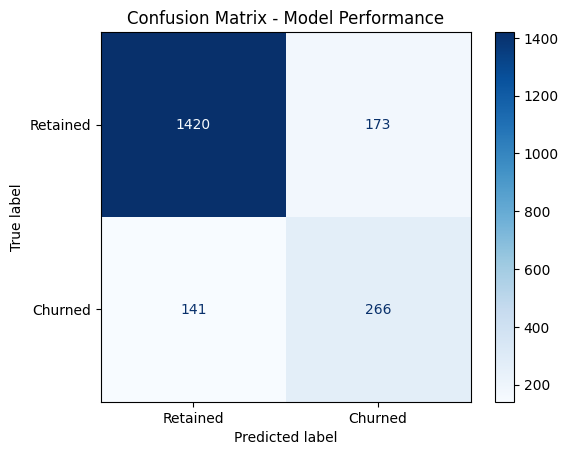

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1593
           1       0.61      0.65      0.63       407

    accuracy                           0.84      2000
   macro avg       0.76      0.77      0.76      2000
weighted avg       0.85      0.84      0.85      2000



In [334]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(final_pipeline, X_test, y_test, display_labels=['Retained', 'Churned'], cmap='Blues')
plt.title("Confusion Matrix - Model Performance")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_smote, zero_division=0))

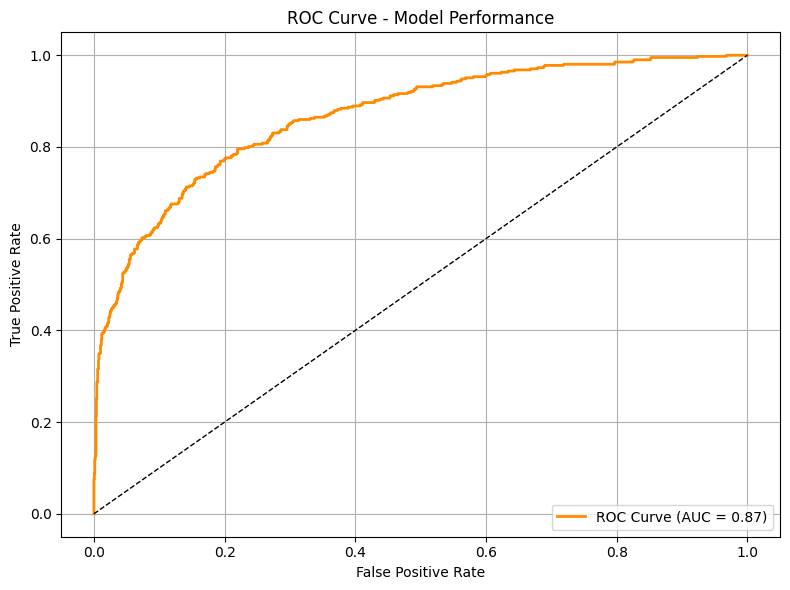

In [336]:
# ROC Curve
y_prob = final_pipeline.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', linewidth=2)
plt.plot([0,1], [0,1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Model Performance")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Final Model Selection — Gradient Boosting with SMOTE
#### After benchmarking multiple models and tuning the Gradient Boosting Classifier, I further enhanced model performance by applying SMOTE (Synthetic Minority Oversampling Technique).
#### The goal was to address the class imbalance in the target variable (Exited), which had ~20% churners, and to improve the model's ability to detect customers likely to leave the bank.

## Final Model Performance (with SMOTE):    
**Accuracy:**	           **84%**,
**Precision (Churn):**	   **61%**, 
**Recall (Churn):**	       **65%**, 
**F1 Score (Churn):**	   **63%**, 
**ROC AUC:**	           **0.87** 

### Confusion Matrix:

Actual \ Predicted | Retained | Churned  
------------------|----------|---------  
Retained (0)      | 1420     | 173      
Churned (1)       | 141      | 266      

### Why Select This Model?
- #### The business objective is to identify as many potential churners as possible so that the bank can intervene proactively.

- #### The SMOTE-enhanced model significantly improved Recall (from 45% → 65%), meaning it now detects 65% of actual churners — a major gain for business impact.

- #### While Precision decreased slightly (expected with class balancing), the model still maintains a solid Precision of 61%, meaning that a majority of flagged customers are true churn risks.

- #### The overall F1 Score improved to 0.63, indicating a well-balanced model.

- #### The ROC AUC of 0.87 further confirms the model's strong discriminative ability.

### Business Takeaway:
#### The selected model is well-suited for deployment in churn prevention programs:

- #### It allows the bank to proactively target a large portion of customers at risk of leaving.

- #### The improved Recall helps minimize costly missed churns.

- #### The model strikes a good balance between coverage (Recall) and targeting efficiency (Precision).

- #### The bank can now use this model to drive personalized retention campaigns and improve customer lifetime value.

# Feature Importance

C:\Users\HOME\AppData\Local\Temp\ipykernel_4148\20382555.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='pastel')


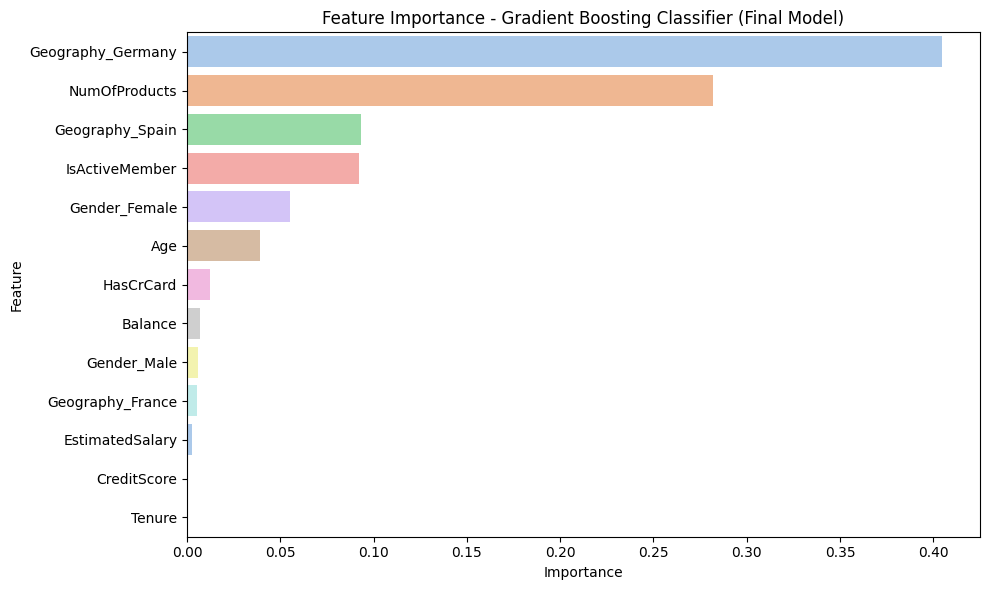

In [365]:
# Helper function to get full feature names from preprocessor
def get_feature_names(preprocessor):
    # Get categorical feature names after OneHotEncoding
    cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
    
    # Numeric feature names
    num_features = numeric_features
    
    # Passthrough feature names
    passthrough = passthrough_features
    
    # Combining all
    return list(cat_features) + num_features + passthrough

# Get feature names
feature_names = get_feature_names(preprocessor)

# Get feature importances
importances = final_pipeline.named_steps['classifier'].feature_importances_

# DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='pastel')
plt.title('Feature Importance - Gradient Boosting Classifier (Final Model)')
plt.tight_layout()
plt.show()

#### Feature Importance Analysis — Gradient Boosting Classifier

#### As part of the final model evaluation, I analyzed feature importance from the Gradient Boosting Classifier to understand which factors most influence customer churn.

#### These insights are critical for the business to design targeted retention strategies.

Top 5 Most Important Features:  
Rank | Feature | Business Interpretation  
-----|---------|--------------------------  
1    | Geography_Germany | Customers from Germany are at significantly higher risk of churn. Geography is a key driver of churn behavior.  
2    | NumOfProducts | The number of products held is highly influential. Customers with fewer products are more likely to churn, highlighting the importance of cross-selling.  
3    | Geography_Spain | Customers from Spain also show a meaningful churn pattern, though less pronounced than Germany.  
4    | IsActiveMember | Inactive members are at higher churn risk, confirming that engagement is critical to retention.  
5    | Gender_Female | Gender shows some influence, with female customers exhibiting different churn patterns than males. This may reflect differences in customer experience or product fit.

#### Additional Insights:
- Age, while somewhat important, is less dominant than engagement and geography factors.  
- Financial features such as Balance and EstimatedSalary contributed less to model decisions.  
- CreditScore and Tenure had very low importance — suggesting that behavioral and demographic factors outweigh pure credit or tenure metrics in predicting churn for this dataset.

#### Business Takeaway:
- The analysis confirms that churn is driven by a combination of geography, engagement level, and product ownership:  
- The bank should prioritize retention efforts for:  
  - Customers in Germany and Spain.  
  - Customers with low product holdings (1 product).  
  - Inactive customers.  
- Strategies such as cross-selling, targeted engagement campaigns, and geography-specific interventions can significantly improve retention.  
- Financial metrics like Balance and EstimatedSalary appear less predictive — highlighting that churn is more influenced by relationship depth and activity rather than purely financial standing.

## Model Explainability with SHAP

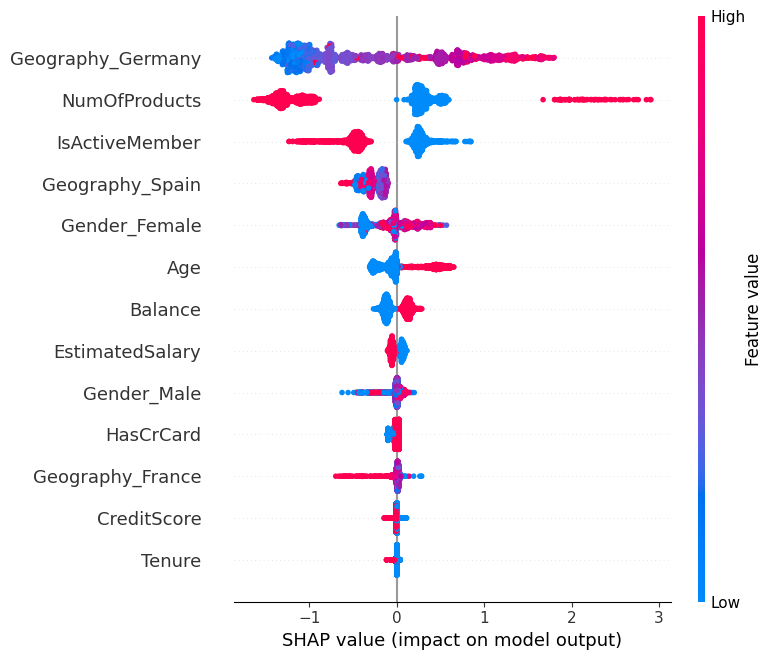

In [382]:
import shap
gbc_model = final_pipeline.named_steps['classifier']

# Create explainer
explainer = shap.Explainer(gbc_model)

# Transform X_test using preprocessor only:
X_test_processed = preprocessor.transform(X_test)

# Get SHAP values
shap_values = explainer(X_test_processed)
# Summary plot (global importance + direction of impact)
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names)

### Model Explainability with SHAP

To further interpret the model, I used **SHAP values**, which provide both **global** and **local** explainability:

- SHAP shows not only which features are important globally, but also **how each feature affects individual predictions**.
- For example, SHAP can explain why a particular customer was predicted to churn → allowing the bank to take personalized actions.

The SHAP summary plot below shows both:
- **Feature importance (global impact)**.
- **Direction of impact** → whether increasing a feature raises or lowers churn risk.

This enhances model transparency and trust — critical for business adoption of machine learning solutions.


# Conclusion — Customer Churn Prediction

### Overview
#### In this project, I developed a predictive model to identify bank customers at risk of churn, utilizing the Churn Modelling Dataset. The primary objective was to empower the bank with the ability to implement proactive retention strategies, thereby enhancing customer lifetime value and fostering loyalty.

#### Key Insights from Exploratory Data Analysis (EDA)
- Churn rates were significantly higher among customers in Germany, indicating a geographical influence on churn behavior.
- Inactive members and customers holding only one product exhibited a much higher risk of churn, highlighting the importance of engagement and product diversity.
- Age and Gender demonstrated secondary effects on churn, while financial features such as Balance and EstimatedSalary were less predictive, suggesting behavioral factors outweigh financial ones in driving churn.

#### Model Benchmarking and Performance
#### Model Selection
Multiple machine learning models were evaluated, and the Gradient Boosting Classifier was selected for its optimal balance between Precision and Recall, making it the best-performing model for this task.

#### Handling Class Imbalance
To address class imbalance in the dataset, Synthetic Minority Oversampling Technique (SMOTE) was applied, ensuring the model could effectively identify churners.

#### Final Model Metrics
- **Accuracy**: 84% — indicating strong overall performance.
- **Recall (Churners)**: 65% — enabling the bank to identify a majority of at-risk customers for targeted action.
- **F1 Score**: 0.63 — reflecting a well-balanced model in terms of precision and recall.
- **ROC AUC**: 0.87 — demonstrating excellent discrimination capability between churners and non-churners.

#### Feature Importance Analysis
- **Geography (Germany)** emerged as the strongest driver of churn, underscoring the need for region-specific strategies.
- **Number of Products** and **IsActiveMember** were identified as key actionable levers, with fewer products and inactivity strongly linked to higher churn risk.
- Purely financial variables, such as Balance and EstimatedSalary, were less influential compared to behavioral and demographic factors, emphasizing the role of customer engagement.

#### Business Recommendations
- Focus retention campaigns on:  
  - German customers, who exhibit the highest churn risk.  
  - Single-product holders, as they are more likely to churn.  
  - Inactive members, who show a higher propensity to leave.  
- Encourage product cross-selling to increase customer stickiness and reduce churn likelihood.  
- Implement engagement programs to activate dormant customers, fostering stronger relationships and loyalty.

#### Final Outcome
- The developed model provides a robust and interpretable tool for predicting customer churn with high accuracy and actionable insights.
- Feature importance analysis offers clear, data-driven business actions to mitigate churn effectively.
- This solution can be seamlessly integrated into the bank’s Customer Relationship Management (CRM) systems, enabling targeted churn prevention strategies and ultimately improving customer retention and loyalty.

#### Impact
By leveraging these insights and the predictive model, the bank can proactively address churn, enhance customer satisfaction, and drive long-term business growth through improved retention strategies.